In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [191]:
prec = pd.read_csv('data/region_prec_years.csv')
temp = pd.read_csv('data/region_temp_years.csv')
cont_country = pd.read_csv('data/Countries-Continents.csv')
dat1 = pd.read_excel('data/GDL RegionConnect dataset .xlsx')
dat2 = pd.read_excel('data/GDL RegionConnect dataset .xlsx')


# fake data 2 -> create 2nd fake data point
dat1["year"] = 2000
dat2["year"] = 2016
d1 = np.random.rand(dat1.shape[0])
d2 = np.random.rand(dat1.shape[0])
dat2["Sub-national HDI"] = dat2["Sub-national HDI"] * (1+0.1*d1)
dat2["Mean years schooling"] = dat2["Mean years schooling"] * (1+0.1*d1)
df = pd.concat([dat1,dat2])



In [192]:
# merge climate data and indicator 
df = df.merge(prec, how="left", left_on=['year','GDLCODE'], right_on=['year', 'GDLcode'] ).drop(columns='GDLcode')
df = df.merge(temp, how="left", left_on=['year','GDLCODE'], right_on=['year', 'GDLcode']  ).drop(columns='GDLcode')
df = df.merge(cont_country, how='left', on='Country')

In [193]:
df.head()

,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling,year,precipitation_trend,temperature_trend,Continent
0,Afghanistan,AFG,National,AFGt,Total,0.511,3.900,2000,NaN,NaN,Asia
1,Afghanistan,AFG,Subnat,AFGr101,Central (Kabul Wardak Kapisa Logar Parwan Panj...,0.591,6.500,2000,-0.848874,1.883317,Asia
2,Afghanistan,AFG,Subnat,AFGr102,Central Highlands (Bamyan Daikundi),0.501,2.426,2000,-0.115377,1.911082,Asia
3,Afghanistan,AFG,Subnat,AFGr103,East (Nangarhar Kunar Laghman Nooristan),0.493,4.344,2000,-0.188196,0.605016,Asia
4,Afghanistan,AFG,Subnat,AFGr104,North (Samangan Sar-e-Pul Balkh Jawzjan Faryab),0.530,3.995,2000,-0.272851,1.734725,Asia


In [197]:
year1 = 2000
year2 = 2016
soc_data = "Sub-national HDI"
climate_data = 'temperature_trend'

bright_cols = ['#e59866','#f7dc6f','#82e0aa','#73c6b6','#85c1e9','#bb8fce','#f1948a']
solid_cols = ['#d35400','#f1c40f','#2ecc71','#16a085','#3498db','#8e44ad','#e74c3c']
colors = pd.DataFrame.from_dict({
    'Continent': df.Continent.unique(),
    'bright_color': bright_cols,
    'solid_color': solid_cols
})

df_pivot = df.pivot(index=['Continent','GDLCODE'], columns='year', values=[soc_data, climate_data])
df_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_pivot.columns]
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.merge(colors, how='left', on='Continent')

df_country = df.groupby(['Country','Continent', 'year']).mean([soc_data, climate_data]).reset_index()
df_country_pivot = df_country.pivot(index=['Continent','Country'], columns='year', values=[soc_data, climate_data])
df_country_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_country_pivot.columns]
df_country_pivot = df_country_pivot.reset_index()
df_country_pivot = df_country_pivot.merge(colors, how='left', on='Continent')



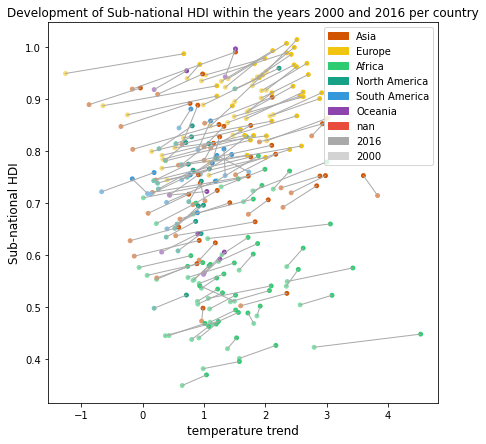

In [201]:
# development on country level because of too many data points
import matplotlib.patches as mpatches #Ellipse 
fig, ax = plt.subplots(figsize=(7,7))

for i, row in df_country_pivot.iterrows():
    plt.plot([row[f'{climate_data}_{year1}'], row[f'{climate_data}_{year2}']],
             [row[f'{soc_data}_{year1}'], row[f'{soc_data}_{year2}']], 
             color='darkgrey', ms=0, linewidth=1
            )
plt.scatter(df_country_pivot[f'{climate_data}_{year1}'], df_country_pivot[f'{soc_data}_{year1}'], color=df_country_pivot.bright_color, s=15, label=f'{year1} - real')
plt.scatter(df_country_pivot[f'{climate_data}_{year2}'], df_country_pivot[f'{soc_data}_{year2}'], color=df_country_pivot.solid_color, s=15, label=f'{year2} - fake')
plt.xlabel('temperature trend', size=12)
plt.ylabel(soc_data,size=12)
plt.title(f'Development of {soc_data} within the years {year1} and {year2} per country')

legend_labels = []
for i, row in colors.iterrows():
    legend_labels.append(mpatches.Patch(color=row.solid_color, label=row.Continent))
legend_labels.extend([
    mpatches.Patch(color='darkgrey', label=str(year2)),
    mpatches.Patch(color='lightgrey', label=str(year1))
])
plt.legend(handles=legend_labels)
fig.savefig('temp_hdi_one_plot.png')


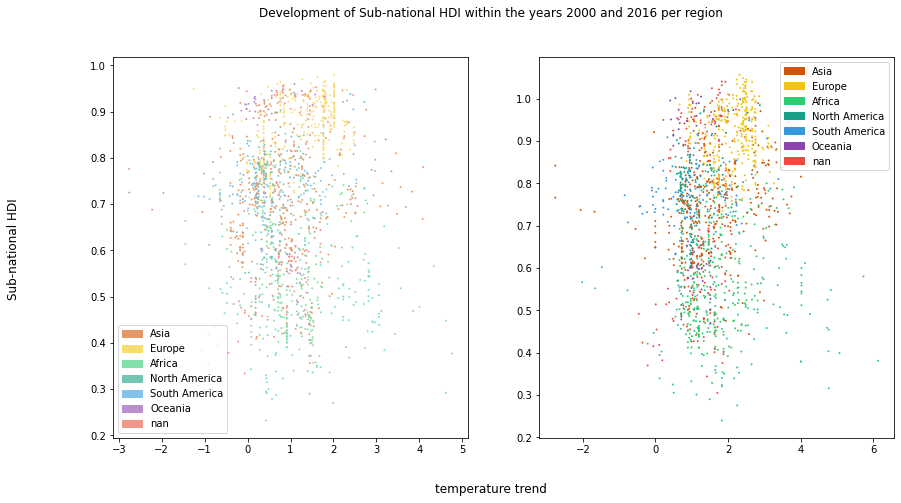

In [200]:
# development on country level because of too many data points
fig, ax = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle(f'Development of {soc_data} within the years {year1} and {year2} per region')
fig.supxlabel('temperature trend', size=12)
fig.supylabel(soc_data,size=12)

ax[0].scatter(df_pivot[f'{climate_data}_{year1}'], df_pivot[f'{soc_data}_{year1}'], color=df_pivot.bright_color, marker='.', linewidth=0, s=15, label=f'{year1} - real')
legend_labels = []
for i, row in colors.iterrows():
    legend_labels.append(mpatches.Patch(color=row.bright_color, label=row.Continent))
ax[0].legend(handles=legend_labels)

ax[1].scatter(df_pivot[f'{climate_data}_{year2}'], df_pivot[f'{soc_data}_{year2}'], color=df_pivot.solid_color, marker='.', linewidth=0, s=15, label=f'{year2} - fake')
legend_labels = []
for i, row in colors.iterrows():
    legend_labels.append(mpatches.Patch(color=row.solid_color, label=row.Continent))
ax[1].legend(handles=legend_labels)

fig.savefig('temp_hdi_two_plots.png')
